# Machine Learning: Hierarchical Clustering
## 1. Introduction

In data mining and statistics, hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering generally fall into two types:

 - __Agglomerative:__ This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
 - __Divisive:__ This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

The results of hierarchical clustering are usually presented in a dendrogram.

## 2. Metrics and Linkage Criteria
In order to decide which clusters should be combined (for agglomerative), or where a cluster should be split (for divisive), a measure of dissimilarity between sets of observations is required. In most methods of hierarchical clustering, this is achieved by use of an appropriate __metric__ (a measure of distance between pairs of observations), and a __linkage criterion__ which specifies the dissimilarity of sets as a function of the pairwise distances of observations in the sets. 

| Metric | Formula |
|--------|---------|
| Euclidean Distance | ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/c28af99d6b7c1ff13d2b79347e90fec407aa9ef0 "Euclidian Distance") |
| Manhattan Distance | ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/6a2e701957744dcdf361a0dc0d79633491e17bfb "Manhattan Distance") |

| Linkage | Formula |
|---------|---------|
| Maximum or Complete Linkage | ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/4ea47cb29523a267681865d874c59575c56860d0 "Maximum or Complete Linkage") |
| Minimum or Single Linkage | ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/d701e358058dbf66bb18b11a570a089a150ef356 "Minimum or Single Linkage") |
| Centroid Linkage |  ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/3982c2dbc00dc22b17e5d18f9881fae054d0823e "Centroid Lingage") where $c_{s}$ and $c_{t}$ are the centroids of clusters s and t|
| Unweighted Average Linkage |  ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/82a2de7a124d8e0f2166fd2d495cd1e437a03d7a "Unweighted Average Linkage") |
| Weighted Average Linkage | ![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/e1b3c894e5ba8264d8b80c22e1056fde29e1f1e0 "Weighed Average Linkage") |

https://en.wikipedia.org/wiki/Hierarchical_clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## 3. Hierarchical Agglomerative Clustering with Random Data
### 3.1 Data Generation
The function below will generate the data points and requires these inputs:
 - n_samples: The total number of points equally divided among clusters.
  - value will be: 750
 - centers: The number of centers to generate, or the fixed center locations.
  - x,y coordinates for generating the centers, e.g. centers=[[4,4], [-3, 3], [-2, -1], [1, 1]]
 - cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
  - value will be: 0.9

In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
import matplotlib as mpl
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
# generate a random dataset
X1, y1 = make_blobs(n_samples=750, centers=[[4,4], [-3, 3], [-2, -1], [1, 1]], cluster_std=0.9)

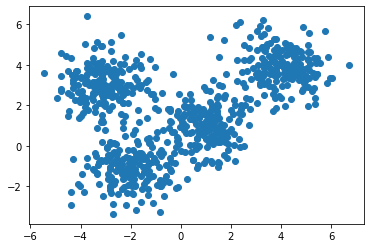

In [3]:
# visualize the dataset 
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

### 3.2 Modelling Agglomerative Clustering
The agglomerative clustering algorithm will require two inputs:
 - n_clusters: The number of clusters to form as well as the number of centroids to generate.
  - value will be: 4
 - linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
  - value will be: 'complete' (can also be “average” or “single”)
 - affinity: This is the metric of distance. It is by default set to "euclidean".

In [4]:
# modelling agglom. clustering with above parameter
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

In [5]:
# fit the model to the data
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4, pooling_func='deprecated')

### 3.3 Visualizing Agglomerative Clustering
Hierarchical clustering can be visualized in one of two ways. Either by converting the predicted cluster labels as numbers of the datapoints or by converting the predicted cluster labels into different colors. Both are illustrated below. 

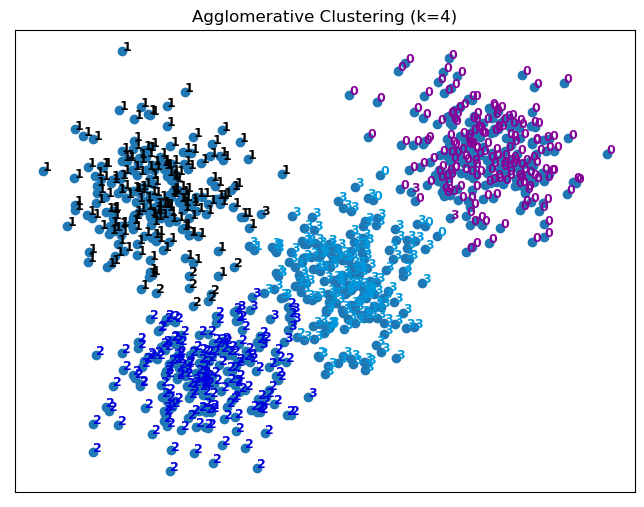

In [6]:
# visualization type 1
mpl.rcdefaults()
# set a figure of size
plt.figure(figsize=(8, 6))

# The next two lines of code are used to scale the data points down,or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# For loop will displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis if you like
plt.xticks([])
plt.yticks([])
# plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
# title & display the plot
plt.title("Agglomerative Clustering (k=4)")
plt.show()

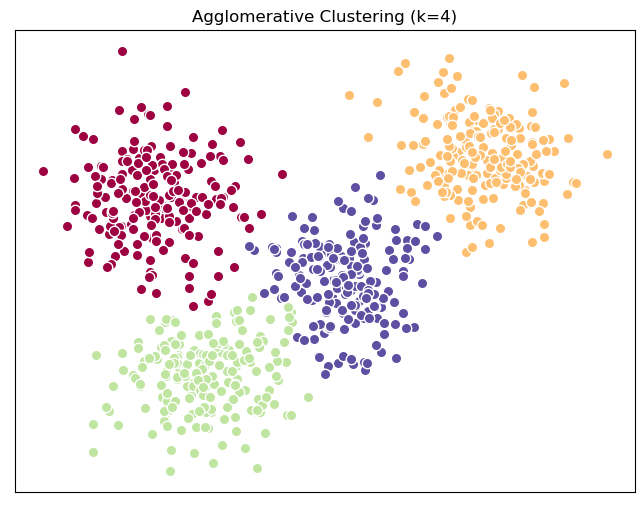

In [7]:
# visualization type 2
mpl.rcdefaults()
# set a figure of size
fig = plt.figure(figsize=(8, 6))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are.
# Use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(agglom.labels_))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-3, 3], [-2, -1], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are in the cluster (ex. cluster 0) are labeled as true
    # else they are labeled as false.
    my_members = (agglom.labels_ == k)
    
       
    # Plots the datapoints with color col.
    ax.plot(X1[my_members, 0], X1[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=15)
    

# Remove the x ticks, y ticks, x and y axis if you like
plt.xticks([])
plt.yticks([])
# plt.axis('off')    
    
# title of the plot
ax.set_title('Agglomerative Clustering (k=4)')
# Show the plot
plt.show()

### 3.5 Dendrogram Associated with Hierarchical Clustering
As hierarchical clustering compares all distances between datapoints to cluster them, creating distance matrix with SciPy that contains the distance from all points to each other can be useful for futher analysis and visualizing the hierarchy in a dendrogram.

In [8]:
# create distance matrix
dist_matrix = distance_matrix(X1,X1) 
dist_matrix[0:5]

array([[0.        , 0.72570252, 0.36233698, ..., 0.27104123, 0.17592255,
        0.67587595],
       [0.72570252, 0.        , 0.38468395, ..., 0.45522185, 0.70578667,
        0.34305216],
       [0.36233698, 0.38468395, 0.        , ..., 0.1099743 , 0.40466095,
        0.33563569],
       [0.05723915, 0.75155517, 0.40083293, ..., 0.30198713, 0.13573488,
        0.72235371],
       [0.34062211, 0.73535375, 0.50694751, ..., 0.40083264, 0.16483577,
        0.83719692]])

In [9]:
# recreate the agglom. clustering algorithm
# use the linkage class from hierarchy, pass in the parameters: dist_matrix, and complete linkage
# this may cause a warning if the matrix is uncondensed 
Z = hierarchy.linkage(dist_matrix, 'complete')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


Hierarchical clustering is typically visualized as a __dendrogram__ as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where points are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

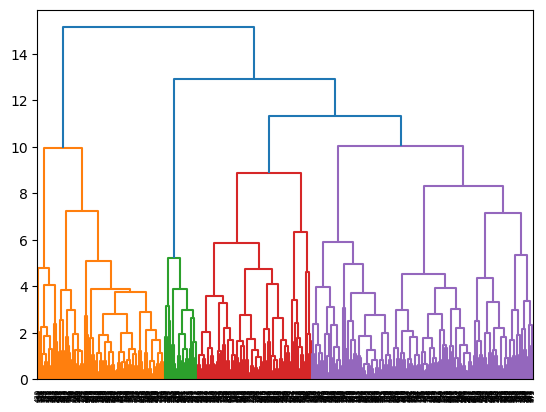

In [10]:
dendro = hierarchy.dendrogram(Z)

Experimenting with different linkage criteria can change the process of clustering as illustrated below.

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


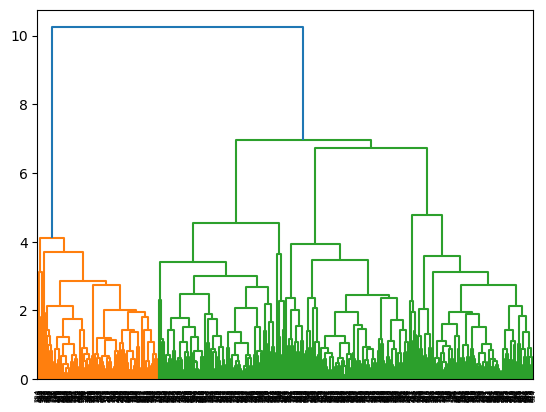

In [11]:
# using 'average' linkage
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

## 4. Hierachical Clustering on Vehicle Dataset
### 4.1 The Goal and the Dataset
Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its product range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes - that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Hierarchical clustering algorithms can find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

The relevant features about automobiles  for clustering analysis include price in US$-thousand (price), engine size in cubic inches (engine_s), horsepower (horsepow), wheelbase in inch (wheelbas), width in inch (width), length in inch (length), curb weight in pounds (curb_wgt), fuel capacity in gallons (fuel_cap) and fuel efficiency (mpg).

In [12]:
# download the dataset from IBM storage
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
print("Download complete.")

Download complete.


In [13]:
# read the dataset into a Pandas DataFrame
df = pd.read_csv("cars_clus.csv")
print ("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


### 4.2 Data Cleaning and Pre-Processing

Data Cleaning and Pre-Processing includes all steps that transform the data into a format that legible and processible by the ML algorithm.

In [14]:
# data cleaning
# drop all rows with missing values
print ("Shape of dataset before cleaning: ", df.size)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.size)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


In [15]:
# feature selection
# only numerical features about the type of car are relevant for this clustering analysis
# i.e. price does not tell what existing cars are similar to the prototype
featureset = df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [16]:
# data normalization
# this is important to even out the magnitude between features and find 'more accurate' distances between datapoints
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx[0:2]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333]])

### 4.3 Clustering with SciPy
In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. The distance matrix and for loops can be used for this iteration. The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each: 'single', 'complete', 'average', 'weighted', and 'centroid'.

In [17]:
# create a SciPy distance matrix with euclidian distances
import scipy
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [18]:
# model SciPy clustering with linkage criterion 'complete'
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


Essentially, hierarchical clustering does not require a pre-specified number of clusters. However, in some applications, a partition of disjoint clusters is needed just as in flat clustering. Set a cutting line.

In [19]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters[0:5]

array([1, 5, 5, 6, 5], dtype=int32)

Additionally, the number of clusters (k) can also be pre-defined.

In [20]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters[0:5]

array([1, 3, 3, 3, 3], dtype=int32)

This process of clustering with SciPy can be displayed as dendrogram.

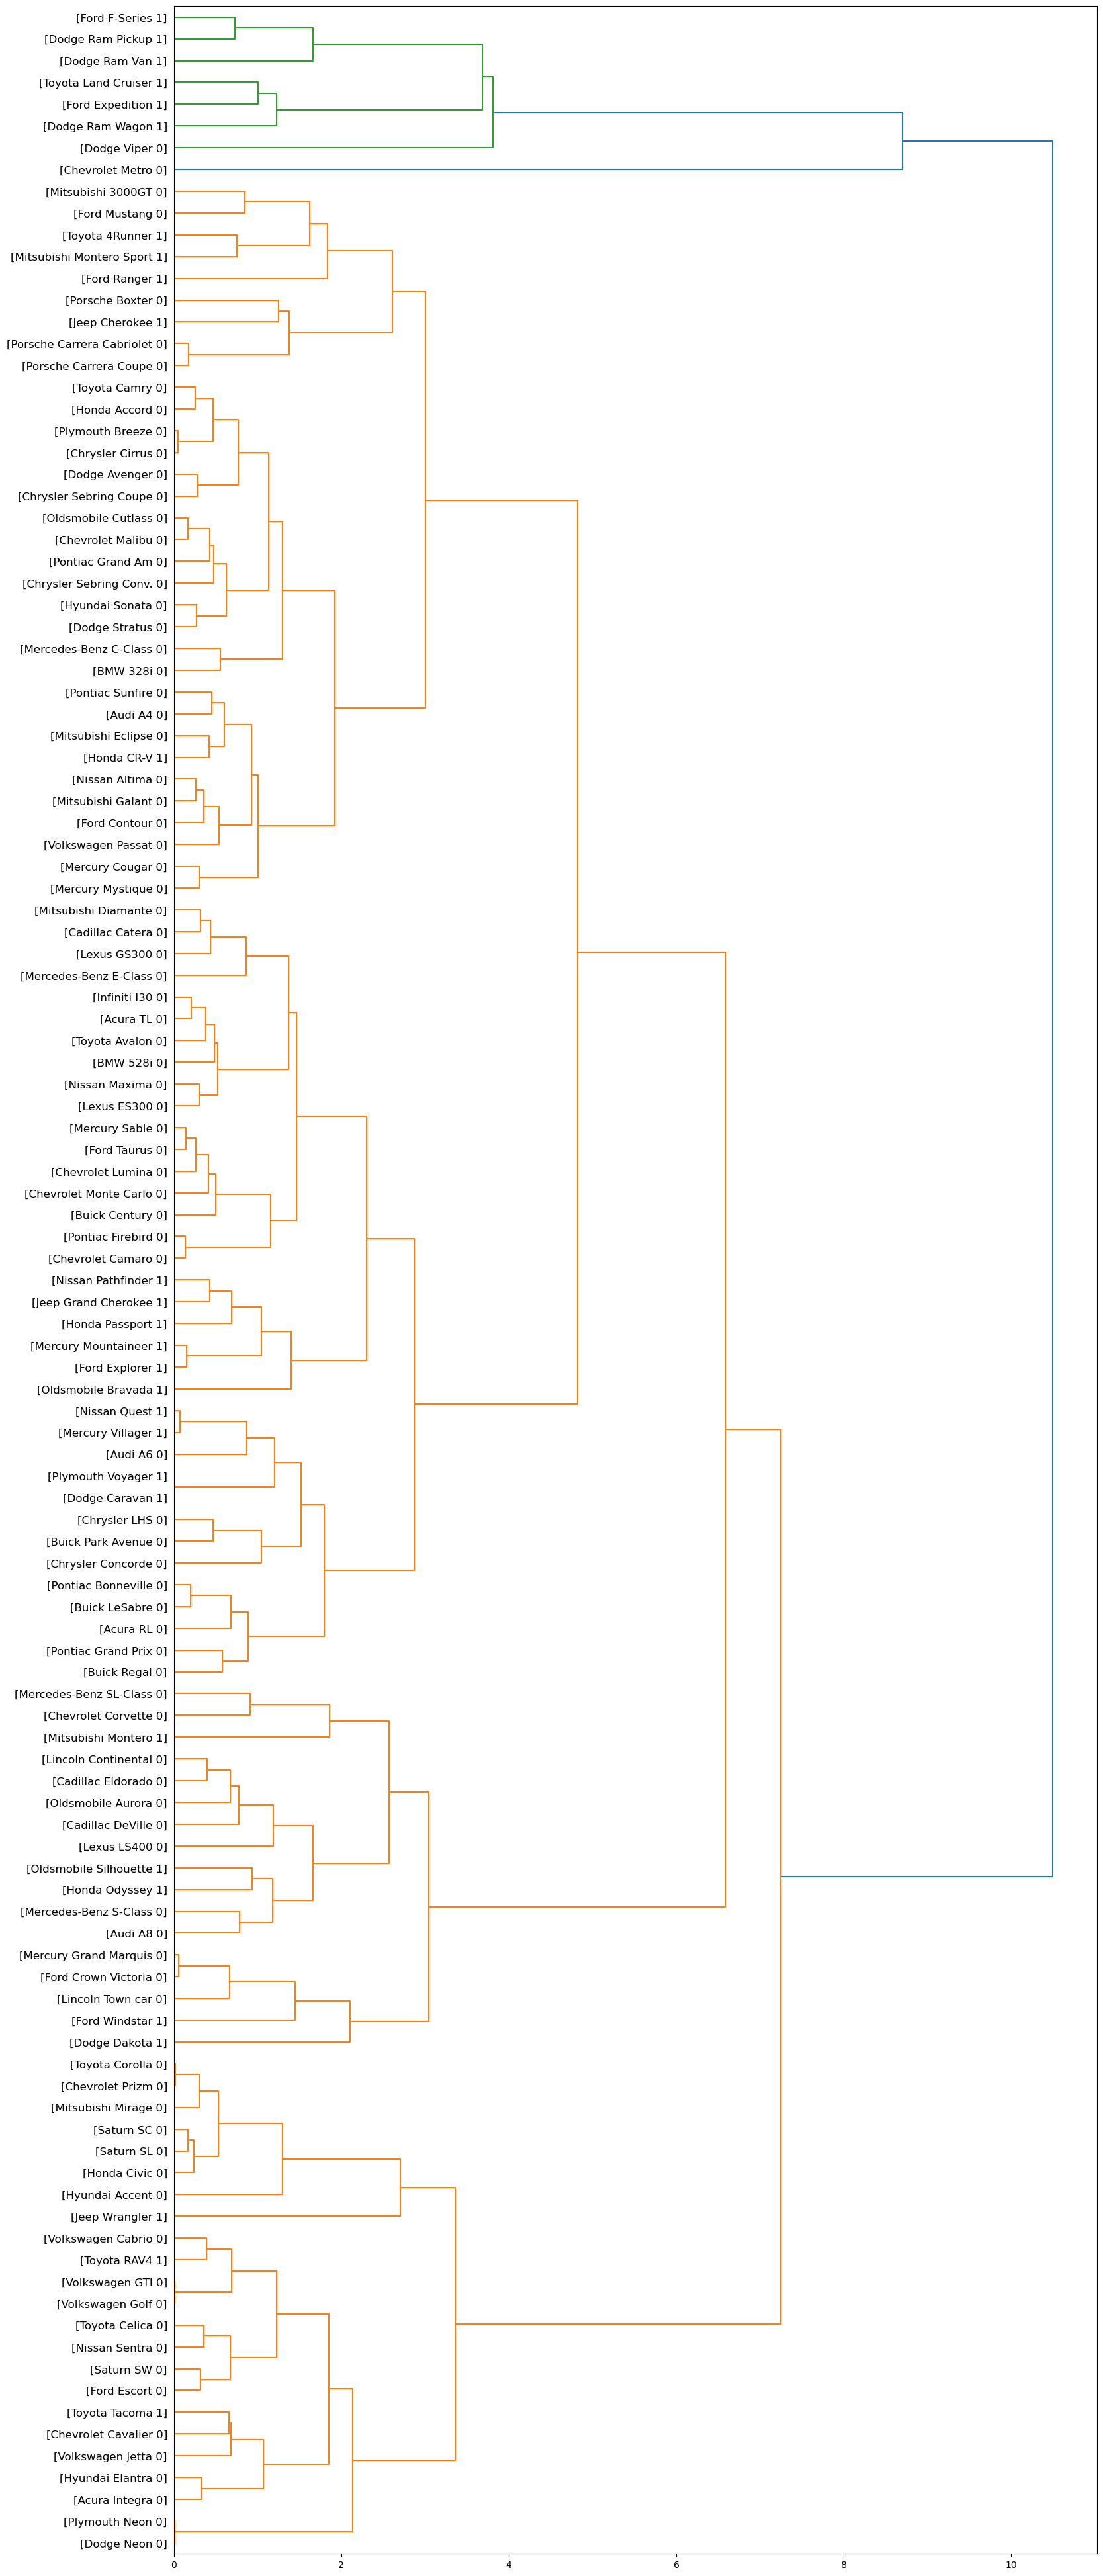

In [21]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

### 4.3 Clustering with Scikit-Learn
The agglomerative clustering algorithm performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:
 - Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
 - Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
 - Average linkage minimizes the average of the distances between all observations of pairs of clusters.


In [22]:
# modelling agglom clustering with Scikit, set k=6
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [23]:
# after the cars have been clustered, their cluster can be added to their description
df['cluster_'] = agglom.labels_
# find the number of cars in each cluster/group of similar vehicles
df['cluster_'].value_counts()

1    52
2    38
3    17
0     6
5     3
4     1
Name: cluster_, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

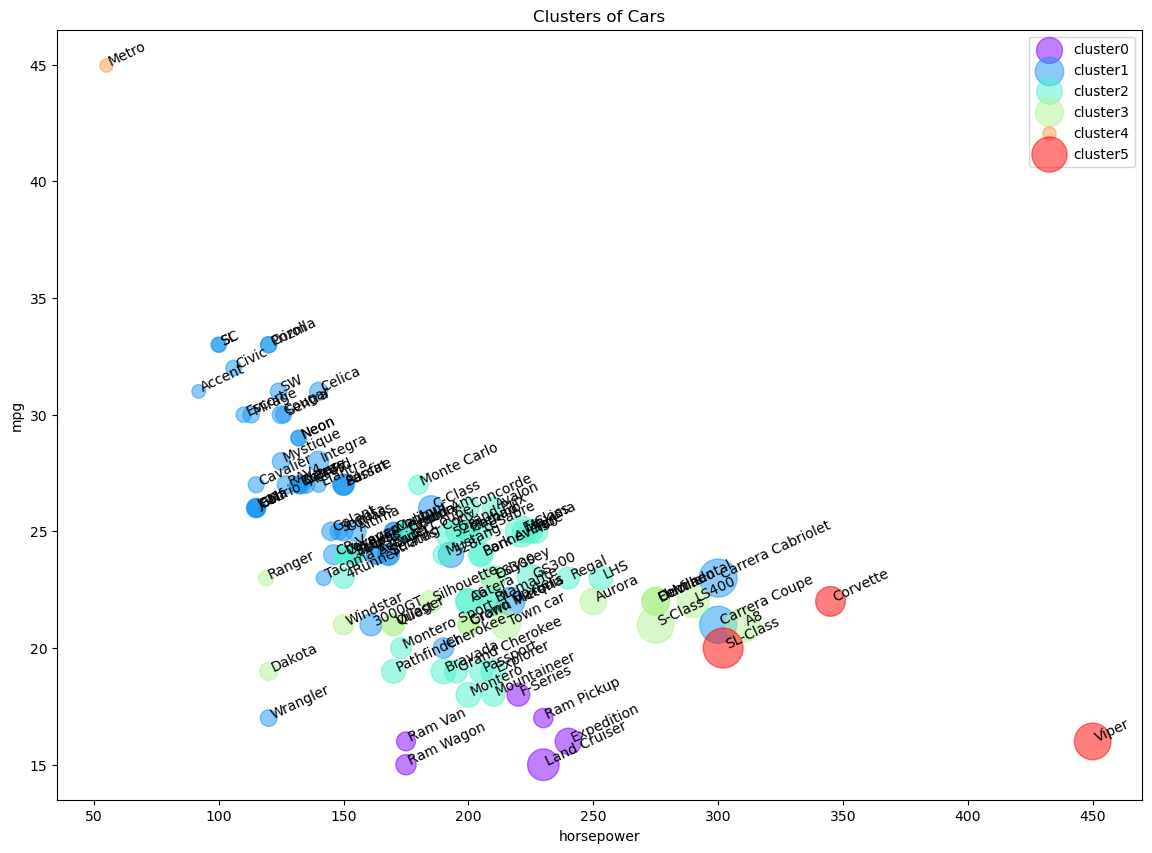

In [24]:
# visualizing the car clusters
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# set figure size
plt.figure(figsize=(14,10))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters of Cars')
plt.xlabel('horsepower')
plt.ylabel('mpg')

### 4.5 Insights from Clustering
Further analysis of the car clusters can help to define what type of car each cluster represents. 

In [25]:
# there are 2 types of vehicles in our dataset: "truck" (value of 1 in 'type') and "car" (value of 0 in 'type')
df.groupby(['cluster_','type'])['cluster_'].value_counts()

cluster_  type  cluster_
0         1.0   0            6
1         0.0   1           47
          1.0   1            5
2         0.0   2           27
          1.0   2           11
3         0.0   3           10
          1.0   3            7
4         0.0   4            1
5         0.0   5            3
Name: cluster_, dtype: int64

In [26]:
# determine the average of each cluster and type
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Text(0, 0.5, 'mpg')

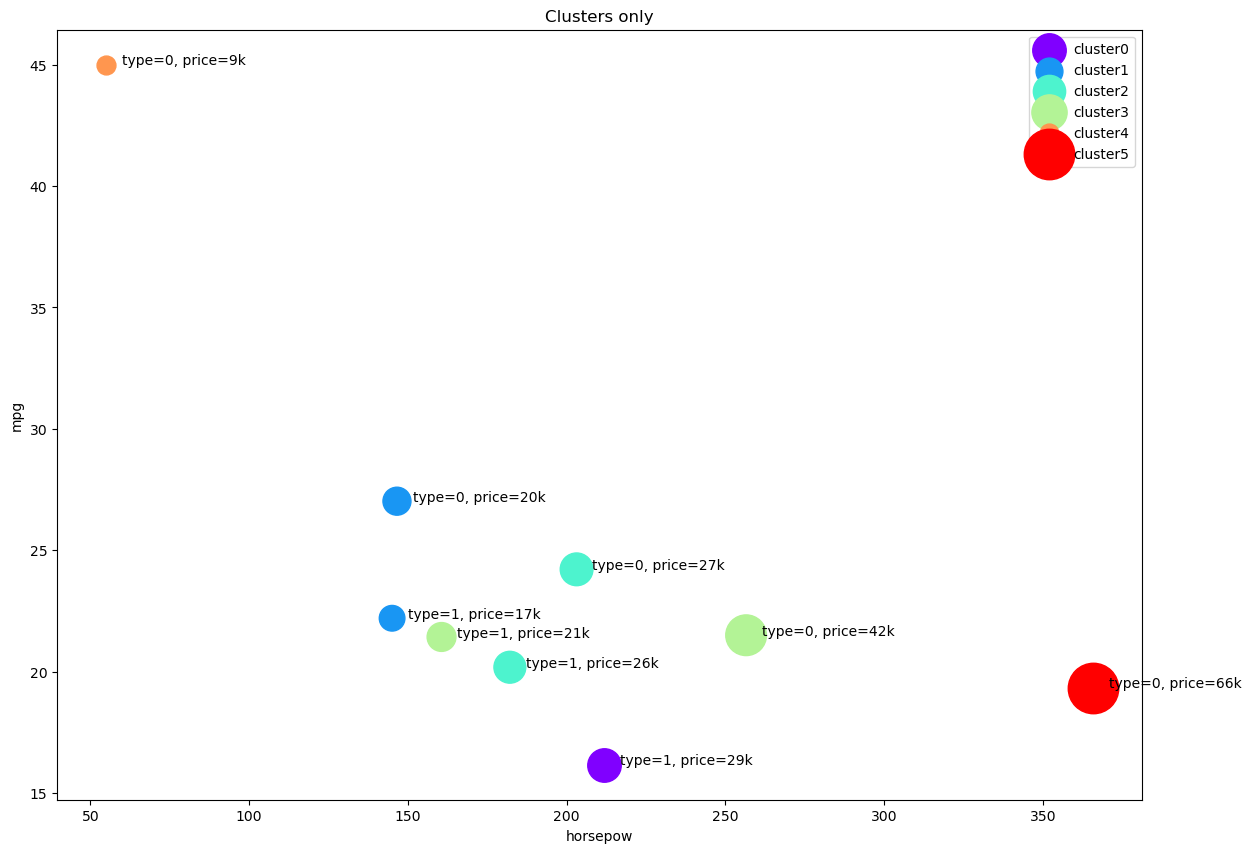

In [27]:
plt.figure(figsize=(14,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters only')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Insights from clustering:
 - Cluster 4 & 5 are exclussively type=car, but 
     - Cluster 4 is highest fuel efficiency and lowest horsepower
     - Cluster 5 is the inverse with lowest fuel efficiency and highest horsepower
 - Cluster 0 is exclussively type=truck and has median horsepower and lowest fuel efficiency
 - Clusters 1,2 & 3 are mixed in type
     - Cluster 1 cars have a higher fuel efficiency but the same horsepower as Cluster 1 trucks
     - Cluster 2 cars have slightly higher horsepower and fuel efficiency than Cluster 2 trucks
     - Cluster 3 trucks have lower horsepower but same fuel efficiency as Cluster 3 cars